# Assignment no 68 (Ensemble Techniques Random Forest Classifier) (14.4.23)

### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

### Attribute Information:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
!pip install gdown

In [2]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Get the file ID from the Google Drive link
file_id = '1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ'

# Download the file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'my_file.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ
To: /home/jovyan/work/Assignments/my_file.csv
100%|██████████| 11.0k/11.0k [00:00<00:00, 29.6MB/s]


'my_file.csv'

In [5]:
df = pd.read_csv('my_file.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [6]:
df.info()  #getting concise summary of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.shape

(303, 14)

In [7]:
df.describe()  #generating descriptive statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# handling missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Conclusion -  Dataset has no any missing values.

In [13]:
# checking for duplicate values

print(df.duplicated().sum())
df[df.duplicated()]

1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Dataset contains one duplicate row, so we can drop it.

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
# check for categorical datatypes

df.select_dtypes('object').columns

Index([], dtype='object')

Conclusion -  We don't have any categorical features within dataset

In [17]:
# splitting dataset into Independent and Dependent/Target variable

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [19]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [21]:
y.unique()

array([1, 0])

Conclusion - Our Target variable has two outcomes i.e. 0(No risk of Heart disease) and 1(Risk of Heart disease)

### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((211, 13), (91, 13), (211,), (91,))

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. 

### Use the default values for other hyperparameters.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# creating an object of Random forest classifier 
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10)  

In [26]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [27]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1])

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [29]:
confusion_matrix = confusion_matrix(y_pred, y_test)
confusion_matrix

array([[36,  8],
       [ 6, 41]])

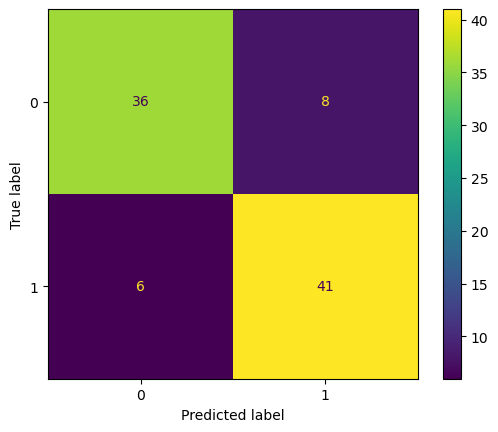

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=rf_classifier.classes_)
disp.plot()
plt.show()

In [40]:
print(f"True Positive : {confusion_matrix[0][0]}")
print(f"False Positive : {confusion_matrix[0][1]}")
print(f"True Negative : {confusion_matrix[1][1]}")
print(f"False Negative : {confusion_matrix[1][0]}")

True Positive : 36
False Positive : 8
True Negative : 41
False Negative : 6


In [46]:
# checking accuracy score for model

print(f"The accuracy score for our Random Forest Classifier model is {(accuracy_score(y_pred, y_test)*100).round(2)} %.")

The accuracy score for our Random Forest Classifier model is 84.62 %.


In [47]:
TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
TN = confusion_matrix[1][1]
FN = confusion_matrix[1][0]

In [48]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.8461538461538461

In [49]:
Precision  = TP/(TP+FP)
Precision

0.8181818181818182

In [50]:
Recall = TP/(TP+FN)
Recall

0.8571428571428571

In [52]:
F1_score = (2 * (Precision * Recall) / (Precision + Recall))
F1_score

0.8372093023255814

### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. 

### Visualise the feature importances using a bar chart.

In [66]:
def select_correlated_features(df, target):
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Get the correlation values for the target column
    target_corr = corr_matrix[target]
    
    # Select the columns that have a correlation greater than 0.4 or less than -0.4
    selected_columns = target_corr[(target_corr >= 0.4) | (target_corr <= -0.4)].index.tolist()
    
    # Remove the target column from the list of selected columns
    selected_columns.remove(target)
    
    return selected_columns

In [71]:
select_correlated_features(df, 'target')

['cp', 'thalach', 'exang', 'oldpeak', 'ca']

### Conclusion - The above mentioned 5 features are most important to predict heart disease risk.

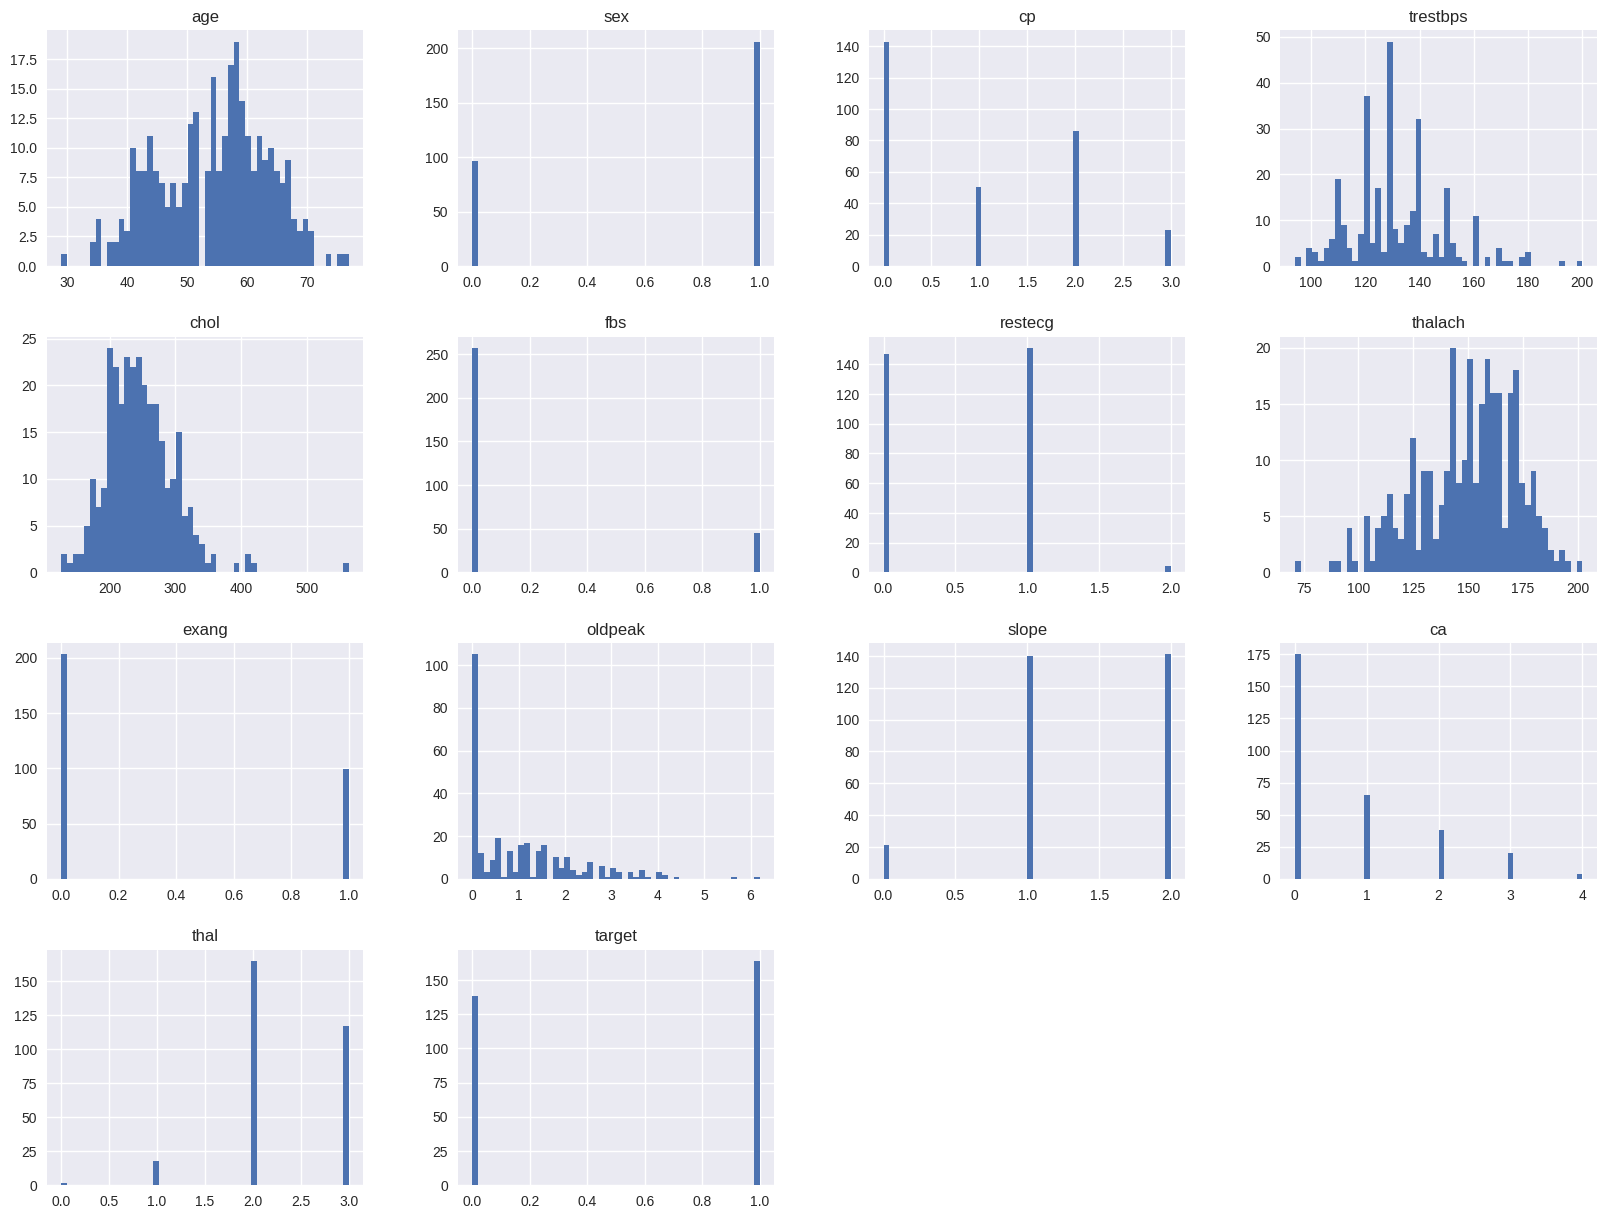

In [63]:
# Plot density plot for all features
df.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot: >

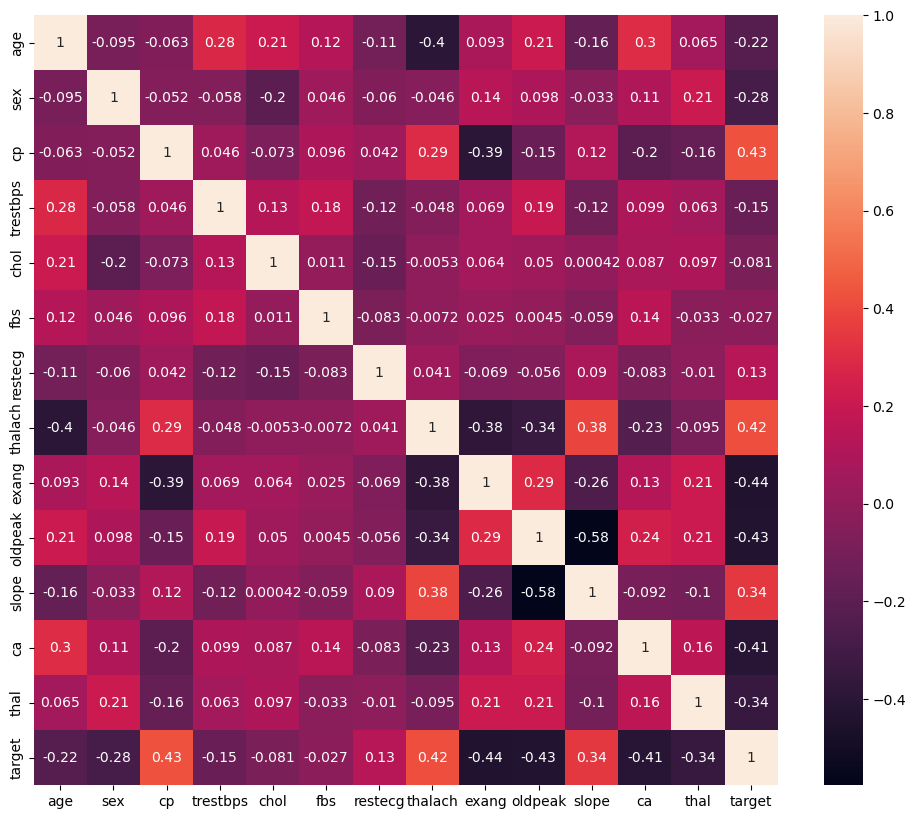

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search.

### Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. 

### Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [76]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [74]:
# Create a Random Forest Classifier
model = RandomForestClassifier(random_state=0)

In [77]:
# Create a Grid Search object
grid_search = GridSearchCV(model, param_grid, cv=5)

In [78]:
# Fit the Grid Search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [79]:
# Print the best set of hyperparameters
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. 

### Compare the performance of the tuned model with the default model.

In [82]:
# Print the best set of hyperparameters and the corresponding performance metrics

print(f"Best hyperparameters: {grid_search.best_params_}")
print("")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Best cross-validation score: 0.8435215946843855


In [85]:
# Evaluate the performance of the first model with 100 no of trees and depth of tree 5.

first_model_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy of first model is {first_model_accuracy.round(2) * 100}%.")



Test accuracy of first model is 85.0%.


In [86]:
# Train a Random Forest Classifier with the best set of hyperparameters found by the grid search

tuned_model = RandomForestClassifier(**grid_search.best_params_, random_state=0)

tuned_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=50,
                       random_state=0)

In [87]:
# Evaluate the performance of the tuned model on the test set

tuned_accuracy = accuracy_score(y_test, tuned_model.predict(X_test))

print(f"Test accuracy of tuned model is {tuned_accuracy.round(2)*100}%.")

Test accuracy of tuned model is 86.0%.


### Conclusion - After Hyperparameter tuning our accuracy of Random Forest model is increased almost by a percent.

### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. 

### Discuss the insights and limitations of the model for predicting heart disease risk.

In [98]:
importances = rf_classifier.feature_importances_
importances

array([0.0951082 , 0.02821948, 0.10901592, 0.07854063, 0.07542999,
       0.01061559, 0.02375093, 0.11368732, 0.06654055, 0.11340048,
       0.04849728, 0.14137895, 0.09581469])

In [99]:
indices = np.argsort(importances)[::-1]
indices

array([11,  7,  9,  2, 12,  0,  3,  4,  8, 10,  1,  6,  5])

In [100]:
top_2_features = X.columns[indices[:2]]
top_2_features

Index(['ca', 'thalach'], dtype='object')

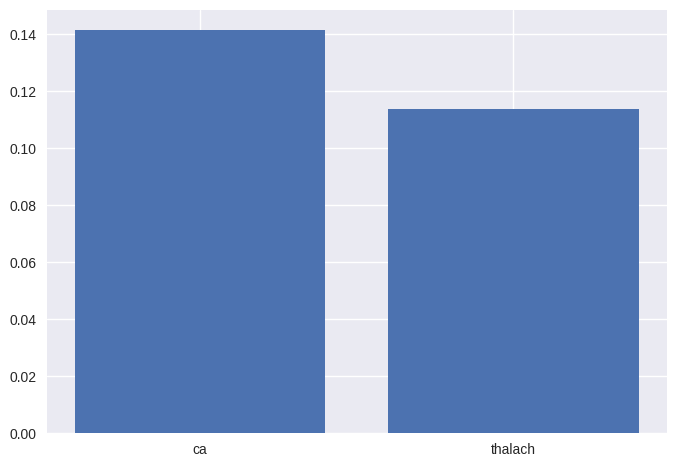

In [101]:
plt.bar(range(2), importances[indices[:2]])
plt.xticks(range(2), top_2_features)
plt.show()

In [102]:
# choose the two most important features

feature1, feature2 = importances.argsort()[-2:]
print(feature1, feature2)

7 11


In [108]:
rfc = RandomForestClassifier()
rfc.fit(X_train[['thalach','oldpeak']], y_train)

RandomForestClassifier()

In [109]:
# create a grid of points covering the range of the two features

X_min, X_max = X_train.iloc[:, feature1].min() - 1, X_train.iloc[:, feature1].max() + 1
y_min, y_max = X_train.iloc[:, feature2].min() - 1, X_train.iloc[:, feature2].max() + 1

XX, yy = np.meshgrid(np.arange(X_min, X_max, 0.1), np.arange(y_min, y_max, 0.1))

In [110]:
# predict the class of each point in the grid

Z = rfc.predict(np.c_[XX.ravel(), yy.ravel()])

Z = Z.reshape(XX.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


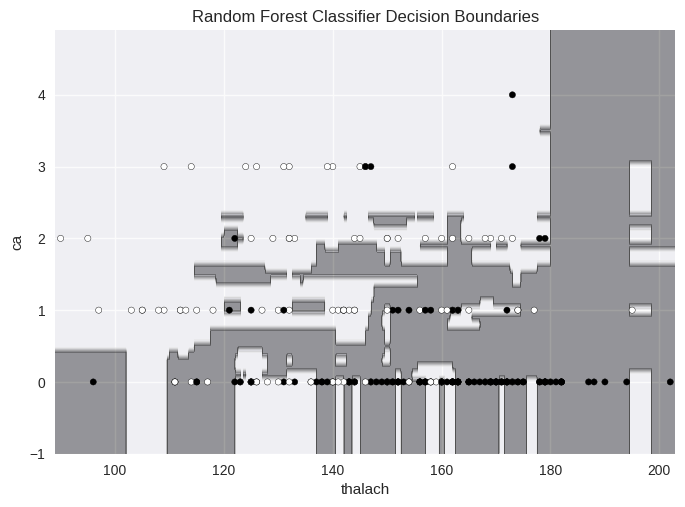

In [111]:
# plot the decision boundaries on a scatter plot of the two features

plt.contourf(XX, yy, Z, alpha=0.4)
plt.scatter(X_train.iloc[:, feature1], X_train.iloc[:, feature2], c=y_train, s=20, edgecolor='k')
plt.xlabel(X_train.columns[feature1])
plt.ylabel(X_train.columns[feature2])
plt.title('Random Forest Classifier Decision Boundaries')
plt.show()

#### Observation

- Its hard to interpret the above decision boundry plot because the model trained for this plot was only trained on two features (the best features), and the model is having a hard time finding a concrete boundry between the two classed based on only two features. Because two features are not enough to separate one class from another properly.

#### Limitations and Insights

- Well first of all there are only 303 samples in the dataset so its not enough for training a more accurate and robust model.
- The dataset is imbalanced so the model will always perform bad on classfying the minority class (unless we handle it by using a technique like upsampling, downsampling or SMOTE etc.)
- We're achieving 80 percent accuracy but like mentioned already the model is performing poorly on class 0 data and so i will never suggest such a model to be deployed without addressing the above mentioned issues.